In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [112]:
def heat_map(num_df):
    corr = num_df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(18, 12))
        ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [102]:
df_1 = pd.read_csv("./data/cat_dummified.csv")
df_1.rename(columns={"other":"other_acc_type"}, inplace=True)

In [195]:
df_2 = pd.read_csv("./data/combined_numbers_weather_days_2018-2020.csv")

In [104]:
df_1["YYYY"] = list(map(lambda x: str(x) + "_", df_1.ujahr)) 
df_1["MM"] = list(map(lambda x: str(x) if len(str(x)) == 2 else "0" + str(x), df_1.umonat)) 

In [105]:
df_1["YYYYMM"] = df_1.YYYY + df_1.MM
df_1.drop(["YYYY", "MM", "ujahr", "umonat", "long", "lat", "uart", "ukategorie", 'ist_rad', 'ist_pkw', 'ist_fuss', 
           'ist_krad', 'ist_gkfz', 'ist_sonstige', 'daylight', 'dusk', 'dark', 'dry', 'wet', "ice"], axis=1, inplace=True)

In [ ]:
# removing redundant columns (data is also found in df_2)
df_1.drop(["YYYY", "MM", "ujahr", "umonat", "long", "lat", "uart", "ukategorie", 'ist_rad', 'ist_pkw', 'ist_fuss', 
           'ist_krad', 'ist_gkfz', 'ist_sonstige', 'daylight', 'dusk', 'dark', 'dry', 'wet', "ice"], axis=1, inplace=True)

In [ ]:
# grouping df_1 by YYYYMM column and creating month column from index
df_1g = df_1.groupby("YYYYMM").sum()

df_1g["month"] = df_1g.index

df_1g.rename(columns={"other":"other_acc_type"}, inplace=True)   # other is used for traffic participant in df_2

In [110]:
# merge both df's
data_comb = pd.merge(df_1g, df_2, on='month')

## Using the whole DataFrame

In [110]:
data_comb = pd.merge(df_1g, df_2, on='month')

In [116]:
data_comb.columns

Index(['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'morning', 'afternoon',
       'evening', 'night', '0hr', '1hr', '2hr', '3hr', '4hr', '5hr', '6hr',
       '7hr', '8hr', '9hr', '10hr', '11hr', '12hr', '13hr', '14hr', '15hr',
       '16hr', '17hr', '18hr', '19hr', '20hr', '21hr', '22hr', '23hr',
       'driving', 'turning', 'turn_in', 'crossing', 'standing_traffic',
       'longitudinal_traffic', 'other_acc_type', 'month', 'bicycle', 'car',
       'pedestrian', 'motorbike', 'truck', 'other', 'slightly_injured',
       'seriously_injured', 'fatal', 'total_acc_w_injury', 'alcohol_related',
       'daylight', 'dark', 'dusk', 'dry', 'wet', 'icy', 'YYYYMM',
       'bank_holiday', 'school_vacation', 'lockdown', 'percipation_mm',
       'sunshine_hours', 'snow_height_mm', 'aver_temp'],
      dtype='object')

In [117]:
df = data_comb.copy()

In [121]:
X = df[['morning', 'afternoon', 'evening', 'night', 'driving', 'turning', 'turn_in', 'crossing', 
         'standing_traffic', 'longitudinal_traffic', 'other_acc_type', 'month', 'alcohol_related',
         'daylight', 'dark', 'dusk', 'dry', 'wet', 'icy', 'bank_holiday', 'school_vacation', 'lockdown', 
         'percipation_mm', 'sunshine_hours', 'snow_height_mm', 'aver_temp']]
y = df.bicycle

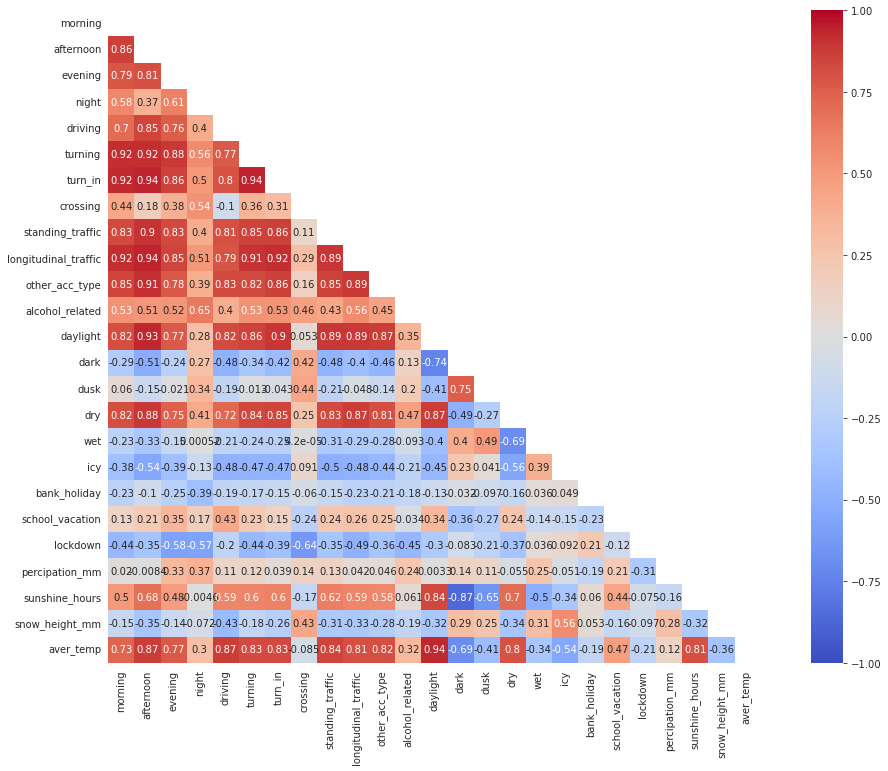

In [122]:
heat_map(X)

In [139]:
X = X[['night', 'crossing', 'dark', 'wet', 'icy', 'bank_holiday', 'school_vacation',
       'lockdown', 'percipation_mm', 'sunshine_hours']]

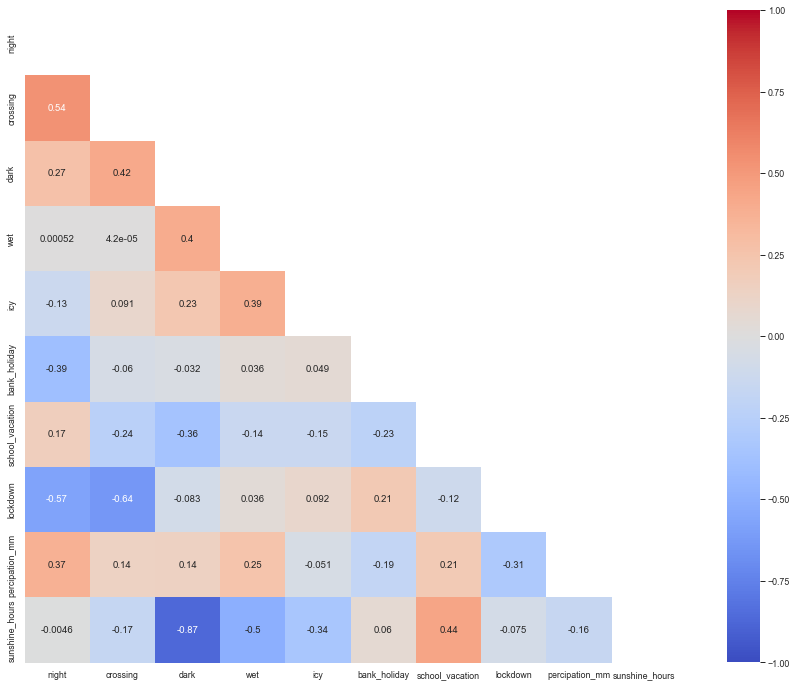

In [140]:
heat_map(X)

In [141]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=42)

X_train_scaled=StandardScaler().fit(X_train).transform(X_train)
X_test_scaled=StandardScaler().fit(X_train).transform(X_train)

X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()

print(print_model)

model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train



model.coef_

print(list(zip(model.coef_, X_train.columns)))

coef_dict = {}
for coef, feat in list(zip(model.coef_, X.columns)):
    coef_dict[feat] = abs(coef)

coef_dict

                            OLS Regression Results                            
Dep. Variable:                bicycle   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     12.65
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           5.10e-06
Time:                        21:33:30   Log-Likelihood:                -150.66
No. Observations:                  28   AIC:                             323.3
Df Residuals:                      17   BIC:                             338.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        437.0357     12.744     34.293      0.0

{'night': 49.93145595180984,
 'crossing': 5.1877819501791524,
 'dark': 63.682986028063056,
 'wet': 42.498485441753985,
 'icy': 64.28963562092937,
 'bank_holiday': 24.317797388154492,
 'school_vacation': 32.25882288508222,
 'lockdown': 12.773735581210172,
 'percipation_mm': 13.168729832796823,
 'sunshine_hours': 86.07316103458311}

Text(0.5, 0, '')

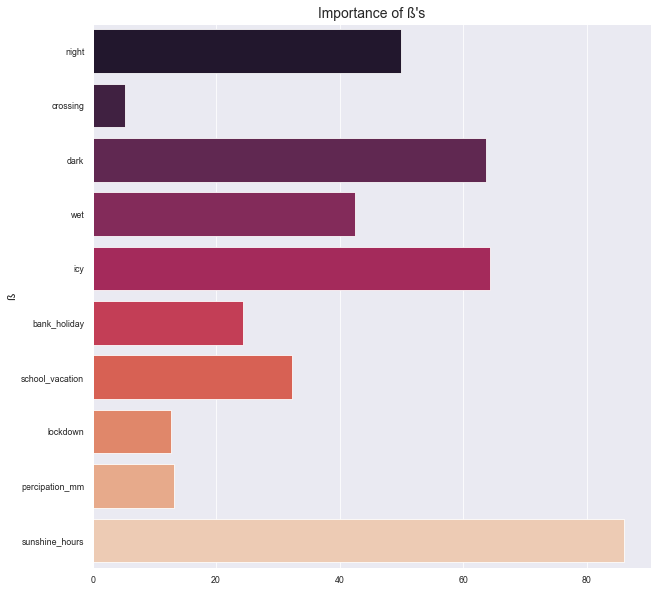

In [142]:
sns.set_style("darkgrid")
sns.set_context("paper")  # font scale lowered to avoid overlapping x-ticks
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data=pd.DataFrame(coef_dict.items()), y=0, x=1, palette="rocket")
ax.set_title("Importance of ß's", size=14)
ax.set_ylabel("ß", fontsize=12)
ax.set_xlabel("")

## Filtering df_1 for bike acc only

In [483]:
df_1.columns

Index(['weekday', 'light_condition', 'street_condition', 'accident_outcome',
       'sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'morning', 'afternoon',
       'evening', 'night', '0hr', '1hr', '2hr', '3hr', '4hr', '5hr', '6hr',
       '7hr', '8hr', '9hr', '10hr', '11hr', '12hr', '13hr', '14hr', '15hr',
       '16hr', '17hr', '18hr', '19hr', '20hr', '21hr', '22hr', '23hr',
       'driving', 'turning', 'turn_in', 'crossing', 'standing_traffic',
       'longitudinal_traffic', 'other', 'YYYYMM'],
      dtype='object')

In [484]:
df_cl.columns

Index(['ujahr', 'umonat', 'weekday', 'uwochentag', 'long', 'lat',
       'time_of_day', 'ustunde', 'light_condition', 'ulichtverh',
       'street_condition', 'ustrzustand', 'uart', 'utyp1', 'ist_rad',
       'ist_pkw', 'ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige',
       'ukategorie', 'accident_outcome'],
      dtype='object')

In [485]:
df_cl = pd.read_csv("./data/cleaned_data.csv")

In [486]:
df_cl_bic = df_cl[df_cl.ist_rad == 1]
len(df_cl_bic)

15306

#### get only "extra" features of df_2

In [487]:
df_2_add = df_2.drop(['bicycle', 'car', 'pedestrian', 'motorbike', 'truck', 'other',
                      'slightly_injured', 'seriously_injured', 'fatal', 'total_acc_w_injury'], axis=1)

In [488]:
df_2_add

,month,alcohol_related,daylight,dark,dusk,dry,wet,icy,YYYYMM,bank_holiday,school_vacation,lockdown,percipation_mm,sunshine_hours,snow_height_mm,aver_temp
0,2018_01,89,388,401,95,358,509,17,201801,1,0,0,67.2,19.5,3.0,3.6
1,2018_02,100,447,235,48,602,107,21,201802,0,6,0,2.7,98.5,0.0,-0.9
2,2018_03,108,566,190,46,516,265,21,201803,1,6,0,44.1,84.4,1.5,1.8
3,2018_04,101,1051,123,43,1067,150,0,201804,1,7,0,38.0,170.9,0.0,13.7
4,2018_05,132,1315,96,51,1424,38,0,201805,3,2,0,15.2,232.2,0.0,17.9
5,2018_06,106,1342,88,36,1370,96,0,201806,0,0,0,26.5,156.3,0.0,19.3
6,2018_07,124,1097,104,35,1163,73,0,201807,0,27,0,70.5,222.3,0.0,21.6
7,2018_08,106,1144,117,51,1248,64,0,201808,0,17,0,6.8,185.3,0.0,21.6
8,2018_09,117,1073,179,76,1194,134,0,201809,0,0,0,21.4,141.7,0.0,16.7
9,2018_10,96,867,254,127,999,249,0,201810,1,10,0,16.5,114.3,0.0,11.3


In [489]:
len(df_cl_bic)

15306

### Bicycle only

In [490]:
df_bic_ = df_cl_bic.copy()
print(len(df_bic_))
for col in ['ist_pkw', 'ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige']:
    df_bic_ = df_bic_[df_bic_[col] == 0] 
    print(len(df_bic_))

15306
4831
3859
3596
3276
2055


#### dummify data

In [491]:
df_bic_["daylight"] = list(map(lambda x: 1 if x == 0 else 0, df_bic_.ulichtverh))
df_bic_["dusk"] = list(map(lambda x: 1 if x == 1 else 0, df_bic_.ulichtverh))
df_bic_["dark"] = list(map(lambda x: 1 if x == 2 else 0, df_bic_.ulichtverh))
df_bic_.drop("ulichtverh", axis = 1, inplace = True)

df_bic_["dry"] = list(map(lambda x: 1 if x == 0 else 0, df_bic_.ustrzustand))
df_bic_["wet"] = list(map(lambda x: 1 if x == 1 else 0, df_bic_.ustrzustand))
df_bic_["ice"] = list(map(lambda x: 1 if x == 2 else 0, df_bic_.ustrzustand))
df_bic_.drop("ustrzustand", axis = 1, inplace = True)

df_bic_["y2018"] = list(map(lambda x: 1 if x == 2018 else 0, df_bic_.ujahr))
df_bic_["y2019"] = list(map(lambda x: 1 if x == 2019 else 0, df_bic_.ujahr))
df_bic_["y2020"] = list(map(lambda x: 1 if x == 2020 else 0, df_bic_.ujahr))
# df_bic_.drop("ujahr", axis = 1, inplace = True)

df_bic_["jan"] = list(map(lambda x: 1 if x == 1 else 0, df_bic_.umonat))
df_bic_["feb"] = list(map(lambda x: 1 if x == 2 else 0, df_bic_.umonat))
df_bic_["mar"] = list(map(lambda x: 1 if x == 3 else 0, df_bic_.umonat))
df_bic_["apr"] = list(map(lambda x: 1 if x == 4 else 0, df_bic_.umonat))
df_bic_["may"] = list(map(lambda x: 1 if x == 5 else 0, df_bic_.umonat))
df_bic_["jun"] = list(map(lambda x: 1 if x == 6 else 0, df_bic_.umonat))
df_bic_["jul"] = list(map(lambda x: 1 if x == 7 else 0, df_bic_.umonat))
df_bic_["aug"] = list(map(lambda x: 1 if x == 8 else 0, df_bic_.umonat))
df_bic_["sep"] = list(map(lambda x: 1 if x == 9 else 0, df_bic_.umonat))
df_bic_["oct"] = list(map(lambda x: 1 if x == 10 else 0, df_bic_.umonat))
df_bic_["nov"] = list(map(lambda x: 1 if x == 11 else 0, df_bic_.umonat))
df_bic_["dec"] = list(map(lambda x: 1 if x == 12 else 0, df_bic_.umonat))
# df_bic_.drop("umonat", axis = 1, inplace = True)

df_bic_["sun"] = list(map(lambda x: 1 if x == 1 else 0, df_bic_.uwochentag))
df_bic_["mon"] = list(map(lambda x: 1 if x == 2 else 0, df_bic_.uwochentag))
df_bic_["tue"] = list(map(lambda x: 1 if x == 3 else 0, df_bic_.uwochentag))
df_bic_["wed"] = list(map(lambda x: 1 if x == 4 else 0, df_bic_.uwochentag))
df_bic_["thu"] = list(map(lambda x: 1 if x == 5 else 0, df_bic_.uwochentag))
df_bic_["fri"] = list(map(lambda x: 1 if x == 6 else 0, df_bic_.uwochentag))
df_bic_["sat"] = list(map(lambda x: 1 if x == 7 else 0, df_bic_.uwochentag))
df_bic_.drop("uwochentag", axis = 1, inplace = True)

df_bic_["morning"] = list(map(lambda x: 1 if x == "morning" else 0, df_bic_.time_of_day))
df_bic_["afternoon"] = list(map(lambda x: 1 if x == "afternoon" else 0, df_bic_.time_of_day))
df_bic_["evening"] = list(map(lambda x: 1 if x == "evening" else 0, df_bic_.time_of_day))
df_bic_["night"] = list(map(lambda x: 1 if x == "night" else 0, df_bic_.time_of_day))
df_bic_.drop("time_of_day", axis = 1, inplace = True)

for _ in range(0,24):
    df_bic_[f"{_}hr"] = list(map(lambda x: 1 if x == _ else 0, df_bic_.ustunde))
df_bic_.drop("ustunde", axis = 1, inplace = True)

df_bic_["driving"] = list(map(lambda x: 1 if x == 1 else 0, df_bic_.utyp1))
df_bic_["turning"] = list(map(lambda x: 1 if x == 2 else 0, df_bic_.utyp1))
df_bic_["turn_in"] = list(map(lambda x: 1 if x == 3 else 0, df_bic_.utyp1))
df_bic_["crossing"] = list(map(lambda x: 1 if x == 4 else 0, df_bic_.utyp1))
df_bic_["standing_traffic"] = list(map(lambda x: 1 if x == 5 else 0, df_bic_.utyp1))
df_bic_["longitudinal_traffic"] = list(map(lambda x: 1 if x == 6 else 0, df_bic_.utyp1))
df_bic_["other"] = list(map(lambda x: 1 if x == 7 else 0, df_bic_.utyp1))
df_bic_.drop("utyp1", axis = 1, inplace = True)

df_bic_.drop(["weekday", "light_condition", "street_condition", "uart"], axis = 1, inplace = True)
df_bic_.rename(columns={"other":"other_acc_type"}, inplace=True)   # other is used for traffic participant in df_2_add

In [492]:
df_bic_["YYYY"] = list(map(lambda x: str(x) + "_", df_bic_.ujahr)) 
df_bic_["MM"] = list(map(lambda x: str(x) if len(str(x)) == 2 else "0" + str(x), df_bic_.umonat)) 

df_bic_["YYYYMM"] = df_bic_.YYYY + df_bic_.MM
# df_bic_car.drop(["YYYY", "MM", "ujahr", "umonat", "long", "lat", "ukategorie", 'daylight', 'dusk', 'dark', 'dry', 'wet', "ice"], axis=1, inplace=True)

# removing redundant columns (data is also found in df_2)
df_bic_.drop(["YYYY", "MM", "ujahr", "umonat", "long", "lat", "ukategorie", 'daylight', 'dusk', 'dark', 'dry', 'wet', "ice"], axis=1, inplace=True)

In [493]:
# grouping df_1 by YYYYMM column and creating month column from index
df_b_g = df_bic_.groupby("YYYYMM").sum()

df_b_g["month"] = df_b_g.index
df_b_g.drop(['ist_pkw', 'ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige', "crossing"], axis = 1, inplace=True)
df_b_g.rename(columns={"other":"other_acc_type"}, inplace=True)   # other is used for traffic participant in df_2

In [494]:
data_comb_b = pd.merge(df_b_g, df_2_add, on='month')


### Bicycle Car only

In [495]:
df_bic_car = df_cl_bic.copy()
print(len(df_bic_car))
for col in ['ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige']:
    df_bic_car = df_bic_car[df_bic_car[col] == 0] 
    print(len(df_bic_car))
#df_bic_car.drop(['ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige'], axis=1, inplace=True)

15306
14298
14012
13676
12260


In [496]:

df_bic_car["daylight"] = list(map(lambda x: 1 if x == 0 else 0, df_bic_car.ulichtverh))
df_bic_car["dusk"] = list(map(lambda x: 1 if x == 1 else 0, df_bic_car.ulichtverh))
df_bic_car["dark"] = list(map(lambda x: 1 if x == 2 else 0, df_bic_car.ulichtverh))
df_bic_car.drop("ulichtverh", axis = 1, inplace = True)

df_bic_car["dry"] = list(map(lambda x: 1 if x == 0 else 0, df_bic_car.ustrzustand))
df_bic_car["wet"] = list(map(lambda x: 1 if x == 1 else 0, df_bic_car.ustrzustand))
df_bic_car["ice"] = list(map(lambda x: 1 if x == 2 else 0, df_bic_car.ustrzustand))
df_bic_car.drop("ustrzustand", axis = 1, inplace = True)

df_bic_car["y2018"] = list(map(lambda x: 1 if x == 2018 else 0, df_bic_car.ujahr))
df_bic_car["y2019"] = list(map(lambda x: 1 if x == 2019 else 0, df_bic_car.ujahr))
df_bic_car["y2020"] = list(map(lambda x: 1 if x == 2020 else 0, df_bic_car.ujahr))
# df_bic_car.drop("ujahr", axis = 1, inplace = True)

df_bic_car["jan"] = list(map(lambda x: 1 if x == 1 else 0, df_bic_car.umonat))
df_bic_car["feb"] = list(map(lambda x: 1 if x == 2 else 0, df_bic_car.umonat))
df_bic_car["mar"] = list(map(lambda x: 1 if x == 3 else 0, df_bic_car.umonat))
df_bic_car["apr"] = list(map(lambda x: 1 if x == 4 else 0, df_bic_car.umonat))
df_bic_car["may"] = list(map(lambda x: 1 if x == 5 else 0, df_bic_car.umonat))
df_bic_car["jun"] = list(map(lambda x: 1 if x == 6 else 0, df_bic_car.umonat))
df_bic_car["jul"] = list(map(lambda x: 1 if x == 7 else 0, df_bic_car.umonat))
df_bic_car["aug"] = list(map(lambda x: 1 if x == 8 else 0, df_bic_car.umonat))
df_bic_car["sep"] = list(map(lambda x: 1 if x == 9 else 0, df_bic_car.umonat))
df_bic_car["oct"] = list(map(lambda x: 1 if x == 10 else 0, df_bic_car.umonat))
df_bic_car["nov"] = list(map(lambda x: 1 if x == 11 else 0, df_bic_car.umonat))
df_bic_car["dec"] = list(map(lambda x: 1 if x == 12 else 0, df_bic_car.umonat))
# df_bic_car.drop("umonat", axis = 1, inplace = True)

df_bic_car["sun"] = list(map(lambda x: 1 if x == 1 else 0, df_bic_car.uwochentag))
df_bic_car["mon"] = list(map(lambda x: 1 if x == 2 else 0, df_bic_car.uwochentag))
df_bic_car["tue"] = list(map(lambda x: 1 if x == 3 else 0, df_bic_car.uwochentag))
df_bic_car["wed"] = list(map(lambda x: 1 if x == 4 else 0, df_bic_car.uwochentag))
df_bic_car["thu"] = list(map(lambda x: 1 if x == 5 else 0, df_bic_car.uwochentag))
df_bic_car["fri"] = list(map(lambda x: 1 if x == 6 else 0, df_bic_car.uwochentag))
df_bic_car["sat"] = list(map(lambda x: 1 if x == 7 else 0, df_bic_car.uwochentag))
df_bic_car.drop("uwochentag", axis = 1, inplace = True)

df_bic_car["morning"] = list(map(lambda x: 1 if x == "morning" else 0, df_bic_car.time_of_day))
df_bic_car["afternoon"] = list(map(lambda x: 1 if x == "afternoon" else 0, df_bic_car.time_of_day))
df_bic_car["evening"] = list(map(lambda x: 1 if x == "evening" else 0, df_bic_car.time_of_day))
df_bic_car["night"] = list(map(lambda x: 1 if x == "night" else 0, df_bic_car.time_of_day))
df_bic_car.drop("time_of_day", axis = 1, inplace = True)

for _ in range(0,24):
    df_bic_car[f"{_}hr"] = list(map(lambda x: 1 if x == _ else 0, df_bic_car.ustunde))
df_bic_car.drop("ustunde", axis = 1, inplace = True)

df_bic_car["driving"] = list(map(lambda x: 1 if x == 1 else 0, df_bic_car.utyp1))
df_bic_car["turning"] = list(map(lambda x: 1 if x == 2 else 0, df_bic_car.utyp1))
df_bic_car["turn_in"] = list(map(lambda x: 1 if x == 3 else 0, df_bic_car.utyp1))
df_bic_car["crossing"] = list(map(lambda x: 1 if x == 4 else 0, df_bic_car.utyp1))
df_bic_car["standing_traffic"] = list(map(lambda x: 1 if x == 5 else 0, df_bic_car.utyp1))
df_bic_car["longitudinal_traffic"] = list(map(lambda x: 1 if x == 6 else 0, df_bic_car.utyp1))
df_bic_car["other"] = list(map(lambda x: 1 if x == 7 else 0, df_bic_car.utyp1))
df_bic_car.drop("utyp1", axis = 1, inplace = True)

df_bic_car.drop(["weekday", "light_condition", "street_condition", "uart"], axis = 1, inplace = True)
df_bic_car.rename(columns={"other":"other_acc_type"}, inplace=True)   # other is used for traffic participant in df_2_add

In [497]:
df_bic_car["YYYY"] = list(map(lambda x: str(x) + "_", df_bic_car.ujahr)) 
df_bic_car["MM"] = list(map(lambda x: str(x) if len(str(x)) == 2 else "0" + str(x), df_bic_car.umonat)) 

df_bic_car["YYYYMM"] = df_bic_car.YYYY + df_bic_car.MM
# df_bic_car.drop(["YYYY", "MM", "ujahr", "umonat", "long", "lat", "ukategorie", 'daylight', 'dusk', 'dark', 'dry', 'wet', "ice"], axis=1, inplace=True)

# removing redundant columns (data is also found in df_2)
df_bic_car.drop(["YYYY", "MM", "ujahr", "umonat", "long", "lat", "ukategorie", 'daylight', 'dusk', 'dark', 'dry', 'wet', "ice"], axis=1, inplace=True)

In [498]:
# grouping df_1 by YYYYMM column and creating month column from index
df_bc_g = df_bic_car.groupby("YYYYMM").sum()

df_bc_g["month"] = df_bc_g.index
df_bc_g.drop(['ist_pkw', 'ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige', "crossing"], axis = 1, inplace=True)
df_bc_g.rename(columns={"other":"other_acc_type"}, inplace=True)   # other is used for traffic participant in df_2

In [499]:
data_comb_bc = pd.merge(df_bc_g, df_2_add, on='month')

In [500]:
# df_ = df.copy()

In [501]:
# df_.columns

In [502]:
# df_.drop(["ist_pkw", 'y2018', 'y2019', 'y2020', 'jan', 'feb', 'mar',
#        'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'sun',
#        'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'morning', 'afternoon',
#        'evening', 'night', '0hr', '1hr', '2hr', '3hr', '4hr', '5hr', '6hr',
#        '7hr', '8hr', '9hr', '10hr', '11hr', '12hr', '13hr', '14hr', '15hr',
#        '16hr', '17hr', '18hr', '19hr', '20hr', '21hr', '22hr', '23hr',
#         'month', 'alcohol_related',
#        'daylight', 'dark', 'dusk', 'dry', 'wet', 'icy', 'YYYYMM',
#        'bank_holiday', 'school_vacation', 'lockdown', 'percipation_mm',
#        'sunshine_hours', 'snow_height_mm', 'aver_temp'], axis = 1, inplace=True)

In [503]:
# heat_map(df_)

In [504]:
# X = df_.drop("ist_rad", axis = 1)
# y = df_.ist_rad


# X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=42)

# X_train_scaled=StandardScaler().fit(X_train).transform(X_train)
# X_test_scaled=StandardScaler().fit(X_train).transform(X_train)

# X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

# model = sm.OLS(y_train, X_train_const_scaled).fit()
# predictions_train = model.predict(X_train_const_scaled)

# X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
# predictions_test = model.predict(X_test_const_scaled)
# print_model = model.summary()

# print(print_model)

# model=LinearRegression()    # model
# model.fit(X_train_scaled, y_train)   # model train



# model.coef_

# print(list(zip(model.coef_, X_train.columns)))

# coef_dict = {}
# for coef, feat in list(zip(model.coef_, X.columns)):
#     coef_dict[feat] = abs(coef)

# coef_dict



# sns.set_style("darkgrid")
# sns.set_context("paper")  # font scale lowered to avoid overlapping x-ticks
# fig, ax = plt.subplots(figsize=(10,10))
# sns.barplot(data=pd.DataFrame(coef_dict.items()), y=0, x=1, palette="rocket")
# ax.set_title("Importance of ß's", size=14)
# ax.set_ylabel("ß", fontsize=12)
# ax.set_xlabel("")

### Bicycle Pedestrian only

In [505]:
df_bic_ped = df_cl_bic.copy()
print(len(df_bic_ped))
for col in ['ist_pkw', 'ist_krad', 'ist_gkfz', 'ist_sonstige']:
    df_bic_ped = df_bic_ped[df_bic_ped[col] == 0] 
    print(len(df_bic_ped))

15306
4831
4568
4248
3024


In [506]:
df_bic_ped["daylight"] = list(map(lambda x: 1 if x == 0 else 0, df_bic_ped.ulichtverh))
df_bic_ped["dusk"] = list(map(lambda x: 1 if x == 1 else 0, df_bic_ped.ulichtverh))
df_bic_ped["dark"] = list(map(lambda x: 1 if x == 2 else 0, df_bic_ped.ulichtverh))
df_bic_ped.drop("ulichtverh", axis = 1, inplace = True)

df_bic_ped["dry"] = list(map(lambda x: 1 if x == 0 else 0, df_bic_ped.ustrzustand))
df_bic_ped["wet"] = list(map(lambda x: 1 if x == 1 else 0, df_bic_ped.ustrzustand))
df_bic_ped["ice"] = list(map(lambda x: 1 if x == 2 else 0, df_bic_ped.ustrzustand))
df_bic_ped.drop("ustrzustand", axis = 1, inplace = True)

df_bic_ped["y2018"] = list(map(lambda x: 1 if x == 2018 else 0, df_bic_ped.ujahr))
df_bic_ped["y2019"] = list(map(lambda x: 1 if x == 2019 else 0, df_bic_ped.ujahr))
df_bic_ped["y2020"] = list(map(lambda x: 1 if x == 2020 else 0, df_bic_ped.ujahr))
# df_bic_ped.drop("ujahr", axis = 1, inplace = True)

df_bic_ped["jan"] = list(map(lambda x: 1 if x == 1 else 0, df_bic_ped.umonat))
df_bic_ped["feb"] = list(map(lambda x: 1 if x == 2 else 0, df_bic_ped.umonat))
df_bic_ped["mar"] = list(map(lambda x: 1 if x == 3 else 0, df_bic_ped.umonat))
df_bic_ped["apr"] = list(map(lambda x: 1 if x == 4 else 0, df_bic_ped.umonat))
df_bic_ped["may"] = list(map(lambda x: 1 if x == 5 else 0, df_bic_ped.umonat))
df_bic_ped["jun"] = list(map(lambda x: 1 if x == 6 else 0, df_bic_ped.umonat))
df_bic_ped["jul"] = list(map(lambda x: 1 if x == 7 else 0, df_bic_ped.umonat))
df_bic_ped["aug"] = list(map(lambda x: 1 if x == 8 else 0, df_bic_ped.umonat))
df_bic_ped["sep"] = list(map(lambda x: 1 if x == 9 else 0, df_bic_ped.umonat))
df_bic_ped["oct"] = list(map(lambda x: 1 if x == 10 else 0, df_bic_ped.umonat))
df_bic_ped["nov"] = list(map(lambda x: 1 if x == 11 else 0, df_bic_ped.umonat))
df_bic_ped["dec"] = list(map(lambda x: 1 if x == 12 else 0, df_bic_ped.umonat))
# df_bic_ped.drop("umonat", axis = 1, inplace = True)

df_bic_ped["sun"] = list(map(lambda x: 1 if x == 1 else 0, df_bic_ped.uwochentag))
df_bic_ped["mon"] = list(map(lambda x: 1 if x == 2 else 0, df_bic_ped.uwochentag))
df_bic_ped["tue"] = list(map(lambda x: 1 if x == 3 else 0, df_bic_ped.uwochentag))
df_bic_ped["wed"] = list(map(lambda x: 1 if x == 4 else 0, df_bic_ped.uwochentag))
df_bic_ped["thu"] = list(map(lambda x: 1 if x == 5 else 0, df_bic_ped.uwochentag))
df_bic_ped["fri"] = list(map(lambda x: 1 if x == 6 else 0, df_bic_ped.uwochentag))
df_bic_ped["sat"] = list(map(lambda x: 1 if x == 7 else 0, df_bic_ped.uwochentag))
df_bic_ped.drop("uwochentag", axis = 1, inplace = True)

df_bic_ped["morning"] = list(map(lambda x: 1 if x == "morning" else 0, df_bic_ped.time_of_day))
df_bic_ped["afternoon"] = list(map(lambda x: 1 if x == "afternoon" else 0, df_bic_ped.time_of_day))
df_bic_ped["evening"] = list(map(lambda x: 1 if x == "evening" else 0, df_bic_ped.time_of_day))
df_bic_ped["night"] = list(map(lambda x: 1 if x == "night" else 0, df_bic_ped.time_of_day))
df_bic_ped.drop("time_of_day", axis = 1, inplace = True)

for _ in range(0,24):
    df_bic_ped[f"{_}hr"] = list(map(lambda x: 1 if x == _ else 0, df_bic_ped.ustunde))
df_bic_ped.drop("ustunde", axis = 1, inplace = True)

df_bic_ped["driving"] = list(map(lambda x: 1 if x == 1 else 0, df_bic_ped.utyp1))
df_bic_ped["turning"] = list(map(lambda x: 1 if x == 2 else 0, df_bic_ped.utyp1))
df_bic_ped["turn_in"] = list(map(lambda x: 1 if x == 3 else 0, df_bic_ped.utyp1))
df_bic_ped["crossing"] = list(map(lambda x: 1 if x == 4 else 0, df_bic_ped.utyp1))
df_bic_ped["standing_traffic"] = list(map(lambda x: 1 if x == 5 else 0, df_bic_ped.utyp1))
df_bic_ped["longitudinal_traffic"] = list(map(lambda x: 1 if x == 6 else 0, df_bic_ped.utyp1))
df_bic_ped["other"] = list(map(lambda x: 1 if x == 7 else 0, df_bic_ped.utyp1))
df_bic_ped.drop("utyp1", axis = 1, inplace = True)

df_bic_ped.drop(["weekday", "light_condition", "street_condition", "uart"], axis = 1, inplace = True)
df_bic_ped.rename(columns={"other":"other_acc_type"}, inplace=True)   # other is used for traffic participant in df_2_add

In [507]:
df_bic_ped["YYYY"] = list(map(lambda x: str(x) + "_", df_bic_ped.ujahr)) 
df_bic_ped["MM"] = list(map(lambda x: str(x) if len(str(x)) == 2 else "0" + str(x), df_bic_ped.umonat)) 

df_bic_ped["YYYYMM"] = df_bic_ped.YYYY + df_bic_ped.MM
# df_bic_ped.drop(["YYYY", "MM", "ujahr", "umonat", "long", "lat", "ukategorie", 'daylight', 'dusk', 'dark', 'dry', 'wet', "ice"], axis=1, inplace=True)

# removing redundant columns (data is also found in df_2)
df_bic_ped.drop(["YYYY", "MM", "ujahr", "umonat", "long", "lat", "ukategorie", 'daylight', 'dusk', 'dark', 'dry', 'wet', "ice"], axis=1, inplace=True)

In [508]:
# grouping df_1 by YYYYMM column and creating month column from index
df_bp_g = df_bic_ped.groupby("YYYYMM").sum()

df_bp_g["month"] = df_bp_g.index
df_bp_g.drop(['ist_pkw', 'ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige', "crossing"], axis = 1, inplace=True)
df_bp_g.rename(columns={"other":"other_acc_type"}, inplace=True)   # other is used for traffic participant in df_2

In [509]:
data_comb_bp = pd.merge(df_bp_g, df_2_add, on='month')

### Bicycle Truck only

In [510]:
df_bic_tru = df_cl.copy()
print(len(df_bic_tru))
for col in ['ist_pkw', 'ist_fuss', 'ist_krad', 'ist_sonstige']:
    df_bic_tru = df_bic_tru[df_bic_tru[col] == 0] 
    print(len(df_bic_tru))

38851
7411
5663
4005
2391


In [511]:
df_bic_tru["daylight"] = list(map(lambda x: 1 if x == 0 else 0, df_bic_tru.ulichtverh))
df_bic_tru["dusk"] = list(map(lambda x: 1 if x == 1 else 0, df_bic_tru.ulichtverh))
df_bic_tru["dark"] = list(map(lambda x: 1 if x == 2 else 0, df_bic_tru.ulichtverh))
df_bic_tru.drop("ulichtverh", axis = 1, inplace = True)

df_bic_tru["dry"] = list(map(lambda x: 1 if x == 0 else 0, df_bic_tru.ustrzustand))
df_bic_tru["wet"] = list(map(lambda x: 1 if x == 1 else 0, df_bic_tru.ustrzustand))
df_bic_tru["ice"] = list(map(lambda x: 1 if x == 2 else 0, df_bic_tru.ustrzustand))
df_bic_tru.drop("ustrzustand", axis = 1, inplace = True)

df_bic_tru["y2018"] = list(map(lambda x: 1 if x == 2018 else 0, df_bic_tru.ujahr))
df_bic_tru["y2019"] = list(map(lambda x: 1 if x == 2019 else 0, df_bic_tru.ujahr))
df_bic_tru["y2020"] = list(map(lambda x: 1 if x == 2020 else 0, df_bic_tru.ujahr))
# df_bic_tru.drop("ujahr", axis = 1, inplace = True)

df_bic_tru["jan"] = list(map(lambda x: 1 if x == 1 else 0, df_bic_tru.umonat))
df_bic_tru["feb"] = list(map(lambda x: 1 if x == 2 else 0, df_bic_tru.umonat))
df_bic_tru["mar"] = list(map(lambda x: 1 if x == 3 else 0, df_bic_tru.umonat))
df_bic_tru["apr"] = list(map(lambda x: 1 if x == 4 else 0, df_bic_tru.umonat))
df_bic_tru["may"] = list(map(lambda x: 1 if x == 5 else 0, df_bic_tru.umonat))
df_bic_tru["jun"] = list(map(lambda x: 1 if x == 6 else 0, df_bic_tru.umonat))
df_bic_tru["jul"] = list(map(lambda x: 1 if x == 7 else 0, df_bic_tru.umonat))
df_bic_tru["aug"] = list(map(lambda x: 1 if x == 8 else 0, df_bic_tru.umonat))
df_bic_tru["sep"] = list(map(lambda x: 1 if x == 9 else 0, df_bic_tru.umonat))
df_bic_tru["oct"] = list(map(lambda x: 1 if x == 10 else 0, df_bic_tru.umonat))
df_bic_tru["nov"] = list(map(lambda x: 1 if x == 11 else 0, df_bic_tru.umonat))
df_bic_tru["dec"] = list(map(lambda x: 1 if x == 12 else 0, df_bic_tru.umonat))
# df_bic_tru.drop("umonat", axis = 1, inplace = True)

df_bic_tru["sun"] = list(map(lambda x: 1 if x == 1 else 0, df_bic_tru.uwochentag))
df_bic_tru["mon"] = list(map(lambda x: 1 if x == 2 else 0, df_bic_tru.uwochentag))
df_bic_tru["tue"] = list(map(lambda x: 1 if x == 3 else 0, df_bic_tru.uwochentag))
df_bic_tru["wed"] = list(map(lambda x: 1 if x == 4 else 0, df_bic_tru.uwochentag))
df_bic_tru["thu"] = list(map(lambda x: 1 if x == 5 else 0, df_bic_tru.uwochentag))
df_bic_tru["fri"] = list(map(lambda x: 1 if x == 6 else 0, df_bic_tru.uwochentag))
df_bic_tru["sat"] = list(map(lambda x: 1 if x == 7 else 0, df_bic_tru.uwochentag))
df_bic_tru.drop("uwochentag", axis = 1, inplace = True)

df_bic_tru["morning"] = list(map(lambda x: 1 if x == "morning" else 0, df_bic_tru.time_of_day))
df_bic_tru["afternoon"] = list(map(lambda x: 1 if x == "afternoon" else 0, df_bic_tru.time_of_day))
df_bic_tru["evening"] = list(map(lambda x: 1 if x == "evening" else 0, df_bic_tru.time_of_day))
df_bic_tru["night"] = list(map(lambda x: 1 if x == "night" else 0, df_bic_tru.time_of_day))
df_bic_tru.drop("time_of_day", axis = 1, inplace = True)

for _ in range(0,24):
    df_bic_tru[f"{_}hr"] = list(map(lambda x: 1 if x == _ else 0, df_bic_tru.ustunde))
df_bic_tru.drop("ustunde", axis = 1, inplace = True)

df_bic_tru["driving"] = list(map(lambda x: 1 if x == 1 else 0, df_bic_tru.utyp1))
df_bic_tru["turning"] = list(map(lambda x: 1 if x == 2 else 0, df_bic_tru.utyp1))
df_bic_tru["turn_in"] = list(map(lambda x: 1 if x == 3 else 0, df_bic_tru.utyp1))
df_bic_tru["crossing"] = list(map(lambda x: 1 if x == 4 else 0, df_bic_tru.utyp1))
df_bic_tru["standing_traffic"] = list(map(lambda x: 1 if x == 5 else 0, df_bic_tru.utyp1))
df_bic_tru["longitudinal_traffic"] = list(map(lambda x: 1 if x == 6 else 0, df_bic_tru.utyp1))
df_bic_tru["other"] = list(map(lambda x: 1 if x == 7 else 0, df_bic_tru.utyp1))
df_bic_tru.drop("utyp1", axis = 1, inplace = True)

df_bic_tru.drop(["weekday", "light_condition", "street_condition", "uart"], axis = 1, inplace = True)
df_bic_tru.rename(columns={"other":"other_acc_type"}, inplace=True)   # other is used for traffic participant in df_2_add

In [512]:
df_bic_tru["YYYY"] = list(map(lambda x: str(x) + "_", df_bic_tru.ujahr)) 
df_bic_tru["MM"] = list(map(lambda x: str(x) if len(str(x)) == 2 else "0" + str(x), df_bic_tru.umonat)) 

df_bic_tru["YYYYMM"] = df_bic_tru.YYYY + df_bic_tru.MM
# df_bic_tru.drop(["YYYY", "MM", "ujahr", "umonat", "long", "lat", "ukategorie", 'daylight', 'dusk', 'dark', 'dry', 'wet', "ice"], axis=1, inplace=True)

# removing redundant columns (data is also found in df_2)
df_bic_tru.drop(["YYYY", "MM", "ujahr", "umonat", "long", "lat", "ukategorie", 'daylight', 'dusk', 'dark', 'dry', 'wet', "ice"], axis=1, inplace=True)

In [513]:
# grouping df_1 by YYYYMM column and creating month column from index
df_bt_g = df_bic_tru.groupby("YYYYMM").sum()

df_bt_g["month"] = df_bt_g.index
df_bt_g.drop(['ist_pkw', 'ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige', "crossing"], axis = 1, inplace=True)
df_bt_g.rename(columns={"other":"other_acc_type"}, inplace=True)   # other is used for traffic participant in df_2

data_comb_bt = pd.merge(df_bt_g, df_2_add, on='month')

### plot accident cause feature importamce

In [526]:
# df_ = data_comb_b.copy()    # bike only
# title_txt = title_txt = f"Accident causes\ncyclists only\n{round(len(df_bic_)*100/len(df_cl_bic) ,2)} % of all bicycle accidents"

# df_ = data_comb_bc.copy()   # bike car accidents
# title_txt = f"Accident causes\ncyclists and car\n{round(len(df_bic_car)*100/len(df_cl_bic) ,2)} % of all bicycle accidents"

df_ = data_comb_bp.copy()   # bike pedestrian accidents
title_txt = f"Accident causes\ncyclists and pedestrians\n{round(len(df_bic_ped)*100/len(df_cl_bic) ,2)} % of all bicycle accidents"

# df_ = data_comb_bt.copy()   # bike truck accidents
# title_txt = f"Accident causes\ncyclists and commercial traffic\n{round(len(df_bic_tru)*100/len(df_cl_bic) ,2)} % of all bicycle accidents"


In [527]:
df_.drop(['y2018', 'y2019', 'y2020', 'jan', 'feb', 'mar',
       'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'sun',
       'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'morning', 'afternoon',
       'evening', 'night', '0hr', '1hr', '2hr', '3hr', '4hr', '5hr', '6hr',
       '7hr', '8hr', '9hr', '10hr', '11hr', '12hr', '13hr', '14hr', '15hr',
       '16hr', '17hr', '18hr', '19hr', '20hr', '21hr', '22hr', '23hr',
        'month', 'alcohol_related',
       'daylight', 'dark', 'dusk', 'dry', 'wet', 'icy', 'YYYYMM',
       'bank_holiday', 'school_vacation', 'lockdown', 'percipation_mm',
       'sunshine_hours', 'snow_height_mm', 'aver_temp'], axis = 1, inplace=True)
# df_.drop("ist_pkw", axis = 1, inplace=True)   # for data_comb_bc only
# df_.drop("ist_fuss", axis = 1, inplace=True)   # for data_comb_bp only

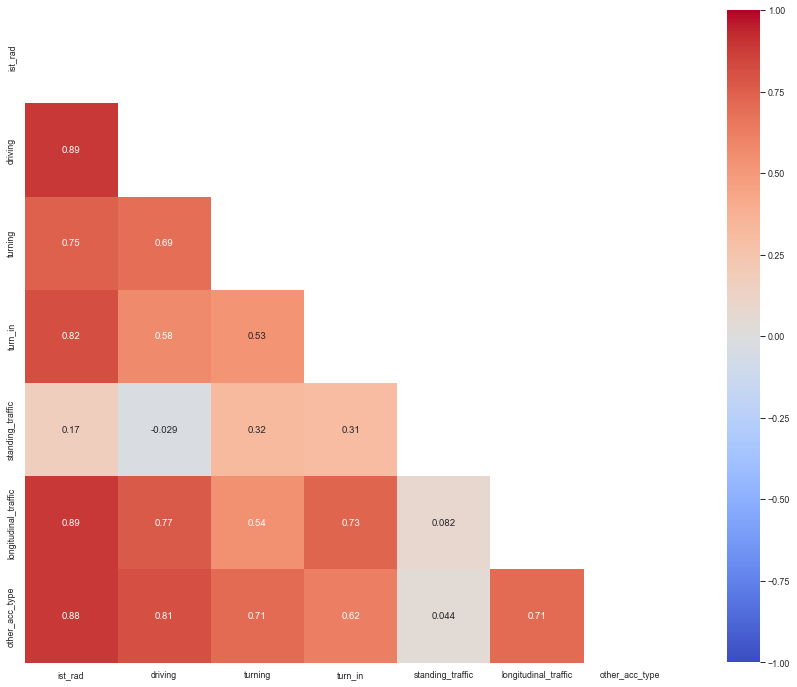

In [528]:
heat_map(df_)

[(10.519598789621568, 'driving'), (1.5856615734296586, 'turning'), (8.936334822852691, 'turn_in'), (2.056683003148849, 'standing_traffic'), (9.413440402095242, 'longitudinal_traffic'), (10.074709686007767, 'other_acc_type')]


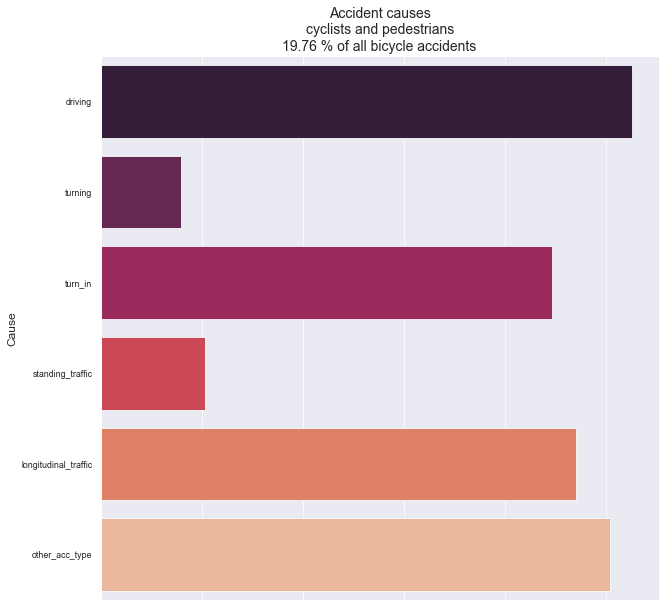

In [529]:
X = df_.drop("ist_rad", axis = 1)
y = df_.ist_rad


X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=42)

X_train_scaled=StandardScaler().fit(X_train).transform(X_train)
X_test_scaled=StandardScaler().fit(X_train).transform(X_train)

X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled)

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled)
print_model = model.summary()

# print(print_model)

model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train



model.coef_

print(list(zip(model.coef_, X_train.columns)))

coef_dict = {}
for coef, feat in list(zip(model.coef_, X.columns)):
    coef_dict[feat] = abs(coef)

coef_dict



sns.set_style("darkgrid")
sns.set_context("paper")  # font scale lowered to avoid overlapping x-ticks
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data=pd.DataFrame(coef_dict.items()), y=0, x=1, palette="rocket").set(xticklabels=[])
ax.set_title(title_txt, size=14)
ax.set_ylabel("Cause", fontsize=12)
ax.set_xlabel("")

plt.savefig("./plots/acc_"+title_txt.split('\n')[1].replace(' ', '_')+".png")